In [82]:
!pip install mtcnn

import mtcnn
from mtcnn.mtcnn import MTCNN

from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

from numpy import asarray

from PIL import Image, ImageOps

# Example of 1 Picture

In [135]:
# load image from file
filename = "/content/14_1.jpg"
pixels = pyplot.imread(filename, 0)

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
faces

[{'box': [481, 76, 80, 106],
  'confidence': 0.9999984502792358,
  'keypoints': {'left_eye': (505, 118),
   'mouth_left': (511, 155),
   'mouth_right': (546, 151),
   'nose': (530, 133),
   'right_eye': (540, 114)}},
 {'box': [694, 510, 60, 74],
  'confidence': 0.9958529472351074,
  'keypoints': {'left_eye': (710, 538),
   'mouth_left': (714, 567),
   'mouth_right': (738, 566),
   'nose': (726, 552),
   'right_eye': (741, 538)}}]

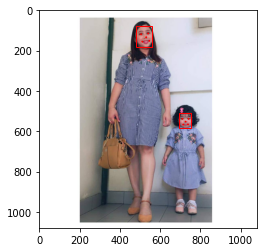

In [136]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = pyplot.imread(filename, 0)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    # create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    # draw the box
    ax.add_patch(rect)
    # draw the dots
    for _, value in result['keypoints'].items():
      # create and draw dot
      dot = Circle(value, radius=2, color='red')
      ax.add_patch(dot)
  # show the plot
  pyplot.show()

# load image from file
pixels = pyplot.imread(filename, 0)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

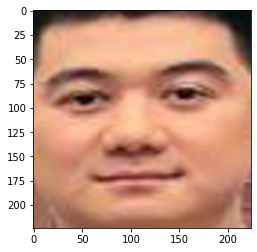

In [19]:
pixels = extract_face('/content/chef_arnold.png')
plt.imshow(pixels)
plt.show()

# Example with some of picture

In [86]:
def extract_face(filename, required_size=(224, 224)):
  pixels = plt.imread(filename, 0)
  detector = MTCNN()
  results = detector.detect_faces(pixels)

  x1, y1, width, height = results[0]['box']
  x2, y2 = x1 + width, y1 + height

  face = pixels[y1:y2, x1:x2]

  image = Image.fromarray(face)
  image = image.resize(required_size)
  face_array = asarray(image)
  return face_array

def cropping_image(test_or_train):
  foldername = os.path.join("/content/datacoba1/", test_or_train)
  filenames = [os.path.join(foldername, dir) for dir in os.listdir(foldername)]
  images = []
  faces = []
  for filename in filenames:
    pixels = extract_face(filename)
    images.append(pixels)

    faces = detector.detect_faces(pixels)
  return images

def show_images(list_of_images_array, img_per_row = 5, nrows = 4):
  fig,ax = plt.subplots(nrows = nrows, ncols = img_per_row,
                        figsize=(12,12),
                        subplot_kw=dict(xticks=[], yticks=[]))
  for row in range(nrows):
      for col in range(img_per_row):
          ax[row, col].imshow(list_of_images_array[row*img_per_row + col].astype('int'))
  plt.show()

def to_grayscale(list_of_array):
  grayscale_images = []
  for image in list_of_array:
    rgb_weights = [0.2989, 0.5870, 0.1140]
    a = np.dot(image, rgb_weights)
    grayscale_images.append(a)
  return grayscale_images

In [ ]:
# datacoba1 = https://drive.google.com/file/d/1Z4rqGwgB7KWE1uaZkCCHpYrUKlbUVv9Y/view?usp=sharing
!gdown 'https://drive.google.com/uc?id=1Z4rqGwgB7KWE1uaZkCCHpYrUKlbUVv9Y'

In [ ]:
!unzip datacoba1

In [22]:
import os

train_dirs = os.listdir("/content/datacoba1/train")
test_dirs = os.listdir("/content/datacoba1/test")

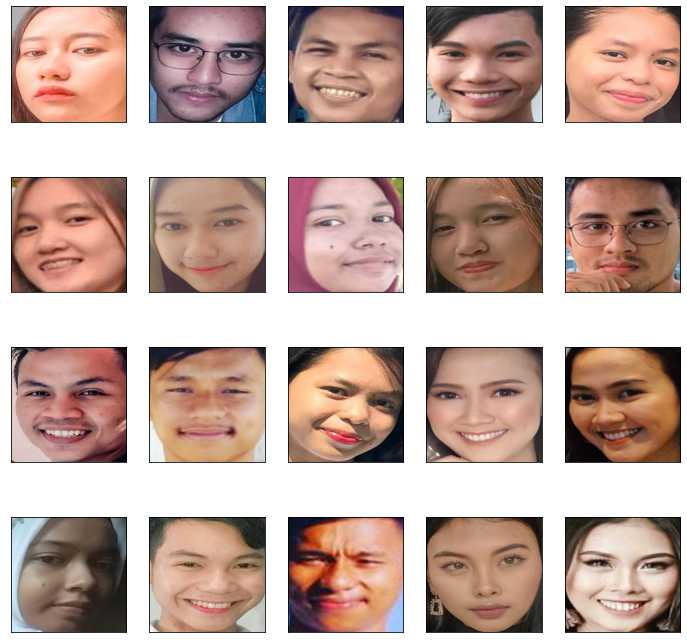

In [87]:
train_images = cropping_image("train")
show_images(train_images)

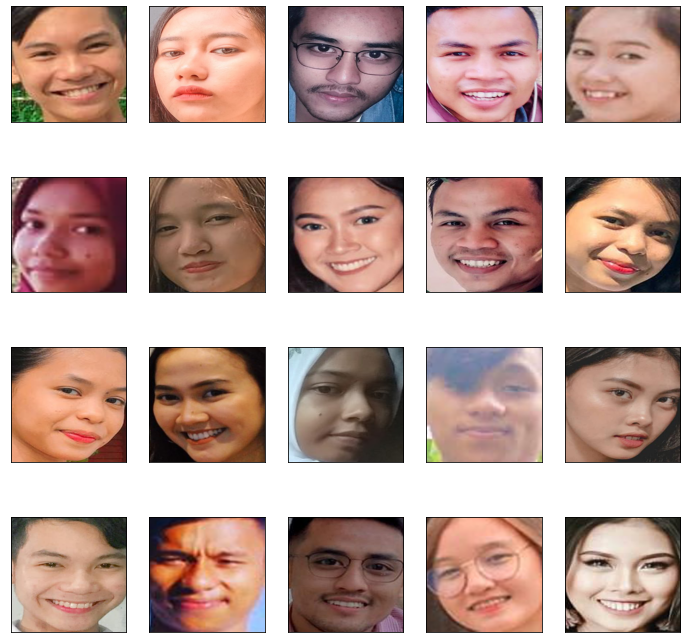

In [88]:
test_images = cropping_image("test")
show_images(test_images)

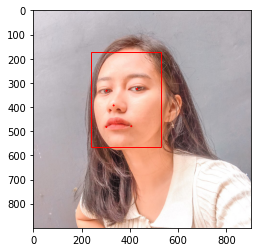

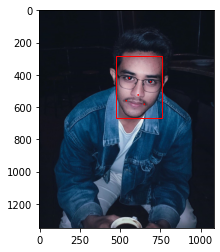

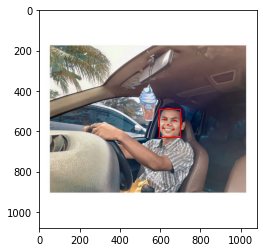

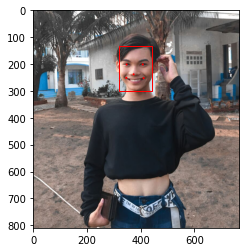

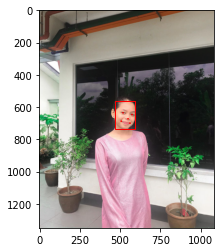

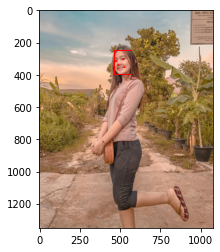

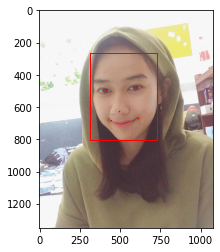

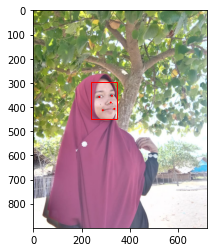

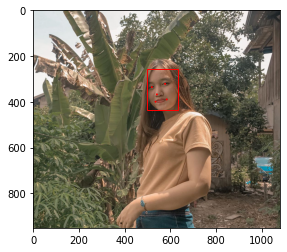

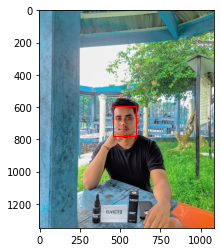

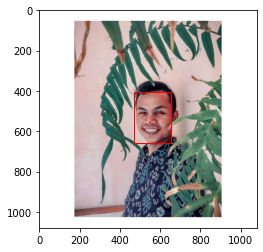

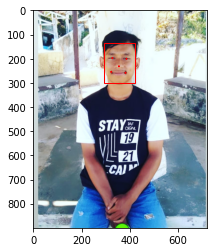

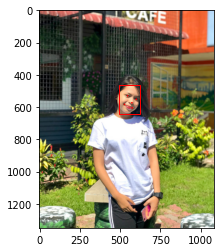

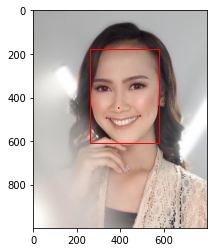

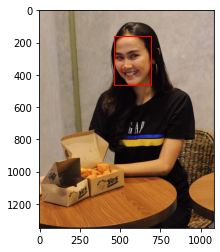

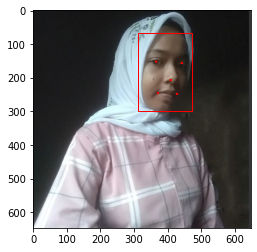

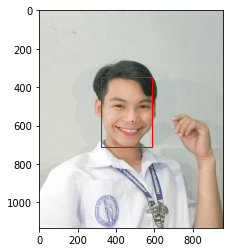

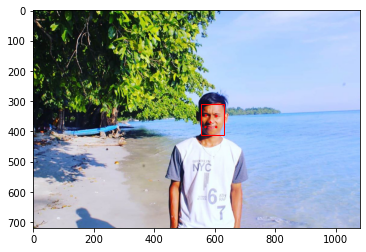

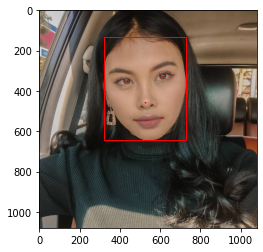

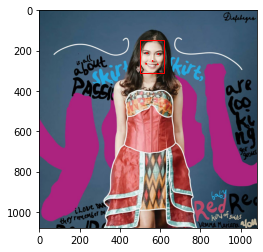

In [26]:
foldername = os.path.join("/content/datacoba1/", "train")
filenames = [os.path.join(foldername, dir) for dir in os.listdir(foldername)]
raw_img_with_box = []
for filename in filenames:
  # load image from file
  pixels = pyplot.imread(filename, 0)
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  faces = detector.detect_faces(pixels)
  # display faces on the original image
  img = draw_image_with_boxes(filename, faces)
  raw_img_with_box.append(img)

Save some 

In [115]:
train_images_gs = to_grayscale(train_images)

In [ ]:
def save_image_to_csv(list_of_images_array, )

In [121]:
# Transformasi dulu dari dimensi (panjang x lebar) menjadi dimensi (1, (panjang x lebar))
# Ingat kalau mau dipakai, kembalikan lagi ke bentuk semula menggunakan reshape
dim = len(train_images_gs[0][0])
train_images_gs_1d = [train_images_gs[i].reshape(dim**2) for i in range(len(train_images_gs))]
np.savetxt(fname="processed_image.csv", delimiter=",", X = train_images_gs_1d)

In [126]:
c = np.loadtxt(fname="processed_image.csv", delimiter=",")
c

array([[177.161 , 175.1612, 177.161 , ..., 158.5769, 161.1745, 167.2771],
       [ 27.7998,  24.8001,  22.8003, ...,  46.1856,  45.4137,  46.9898],
       [ 30.1893,  29.1894,  27.1896, ...,  47.9504,  46.0646,  45.7657],
       ...,
       [ 17.9903,  17.9903,  18.5773, ..., 196.5604, 196.6744, 196.6744],
       [ 44.0665,  43.0666,  35.0674, ...,  41.8925,  55.8911,  47.8919],
       [ 32.0847,  32.0847,  32.0847, ...,  19.0367,  20.0366,  20.0366]])

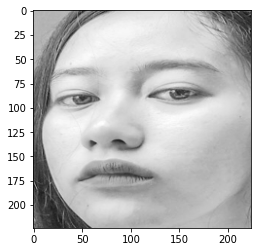

In [127]:
c[0].reshape(224, 224)
plt.imshow(c[0].reshape(224, 224), cmap="gray")